# Источники и введение



https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

https://github.com/ds-leehanjin/league-of-legends-outcome-classification

https://towardsdatascience.com/the-path-to-a-victorious-league-of-legends-match-40d51a1a089e

Данные, которые мы используем для проведения этого анализа, были получены из  [данных](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min) Kaggle, который был получен через Riot API. Он включает данные из 9879 соревновательных матчей с высоким рейтингом ( Diamond I to Master) с 19 features на команду и одной целевой переменной, которая указывает, привел ли матч к победе синей команды.

**Глоссарий функций**:

**Ward**: предмет, который игроки могут разместить на карте, чтобы открыть близлежащую область. Очень полезно для управления картой/целями. 

**Assist**: присуждается частичное количество золота и очков опыта, когда нанесенный урон способствует смерти врага.

**Elite Monsters**: монстры с высоким уровнем здоровья/урона, которые дают огромный бонус (золото/опыт/характеристики) при убийстве командой.

**Dragon**: он же Drake. Этот могущественный нейтральный монстр дает различные постоянные эффекты и положительные эффекты, когда его убивает команда.

**Herald**: монстр, который появляется на восьмой минуте. Дает бафф, который позволяет пользователю вызывать Herald для вашей команды, чтобы помочь проталкивать башни и линии.

**Tower**: Сооружение, преграждающее путь противнику к базе. Они получают высокий урон и стреляют по противникам в определенном радиусе.

**Minions**: неигровые персонажи (NPC), которые дают опыт после смерти и золото игроку, нанесшему последний удар.

**Jungle Minions**: NPC, принадлежащие NO TEAM. Они дают золото, опыт и временные баффы, когда их убивают игроки.

**Gank**: внезапная атака на вражеского champion, обычно координируемая и выполняемая лесником или бродячим лейнером, а также лейнером, получающим ганк. Ранние попытки Gank часто пытаются застать вражеского champion  врасплох и убить его, прежде чем он сможет добраться до своей башни или товарищей по команде.

**Gold**: валюта, присуждаемая за убийство монстров или вражеских игроков, а также за выполнение задач.

**Level**: Champion level. Max is 18.

**Методы**


Random Forest 

Logistic Regression (Логистическая регрессия)
Random Forest (Случайный леc) 
XGBoost: Random Forest 

Логистическая регрессия — это модель с наименьшими вычислительными затратами, поэтому мы используем ее в качестве основы для сравнения других наших моделей и определения того, есть ли смысл в использовании более сложных моделей.

Затем мы переходим к моделям Random Forest и XGBoost, чтобы увидеть, может ли метод ансамбля обеспечить лучшую прогностическую модель, при этом также учитывая проблему переобучения.

# Подготовка данных

In [1]:
# Import packages to be used in notebook.
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

from xgboost import XGBRFClassifier, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load data and display basic info.
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


None

In [3]:
df1 = df.copy()

In [4]:
# Drop gameId column, since this is simply an identifier for each match
# and should not be included as part of our models.
df1.drop('gameId', axis=1, inplace=True)
df1.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
# Create df with no removed features.
df_big = df.copy()

In [6]:
# Create df with only target variable and directly controllable aspects of 
# the game.
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,1,6,6,7,1,0,0,225,67



Мы видим, что есть признаки с высокой [мультиколлинеарностью](https://habr.com/ru/company/akbarsdigital/blog/592493/). Это  проблема для логистической регрессии, поэтому мы будем избегать использования df_big для нашей модели логистической регрессии.

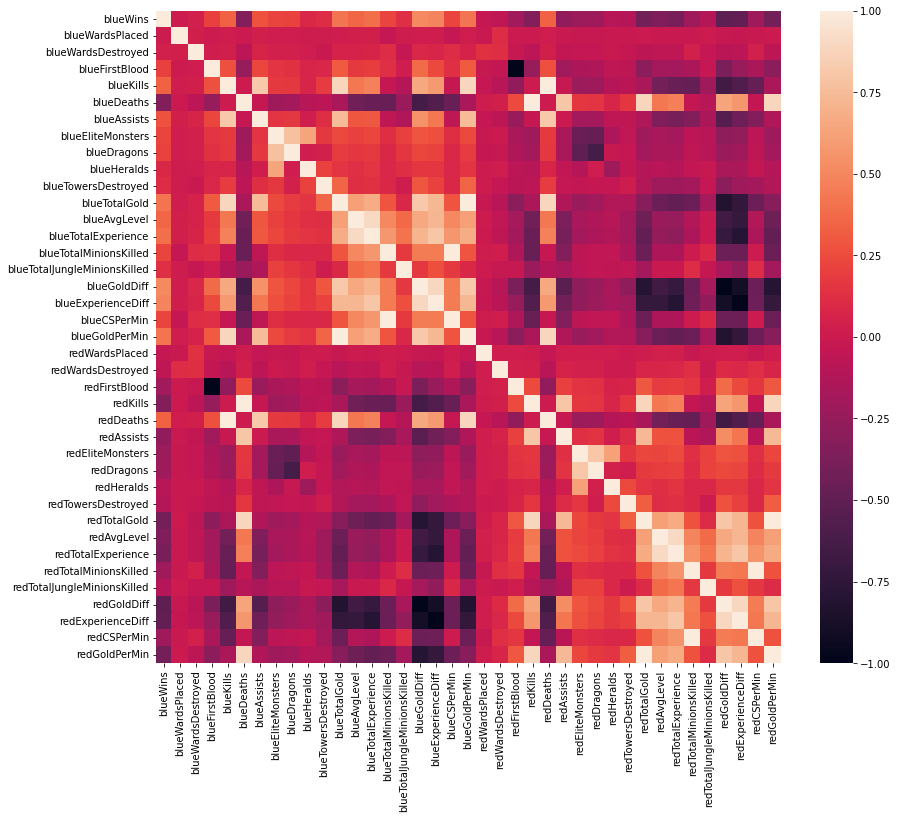

In [7]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_big.corr()) # light color : +vely corr, dark color: -vely corr

Несмотря на то, что мультиколлинеарность не такая уж большая проблема в этом  датасете, у нас все еще есть некоторые признаки с идеальной мультиколлинеарностью: redFirstBlood, redKills и redDeaths. Эти функции являются идеальными противоположностями blueFirstBlood, blueDeaths и blueKills соответственно, поэтому мы продолжим и удалим эти столбцы, чтобы подготовить наш набор данных для логистической регрессии.

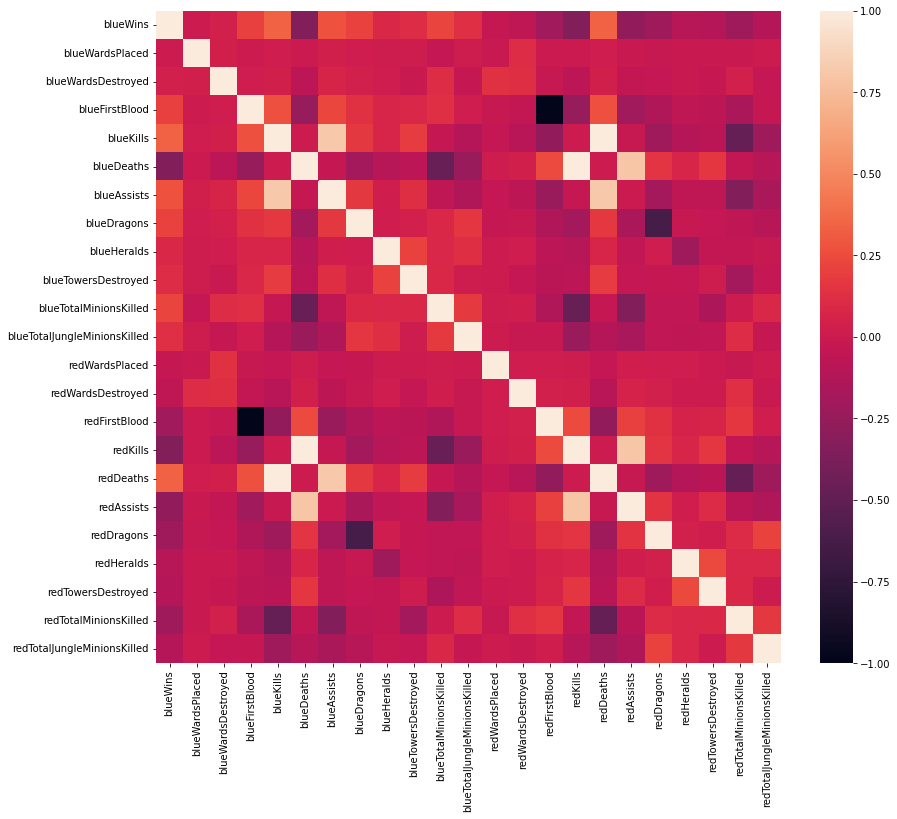

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_select.corr()) # light color : +vely corr, dark color: -vely corr

In [9]:
# Drop highly columns with high multicollinearity.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

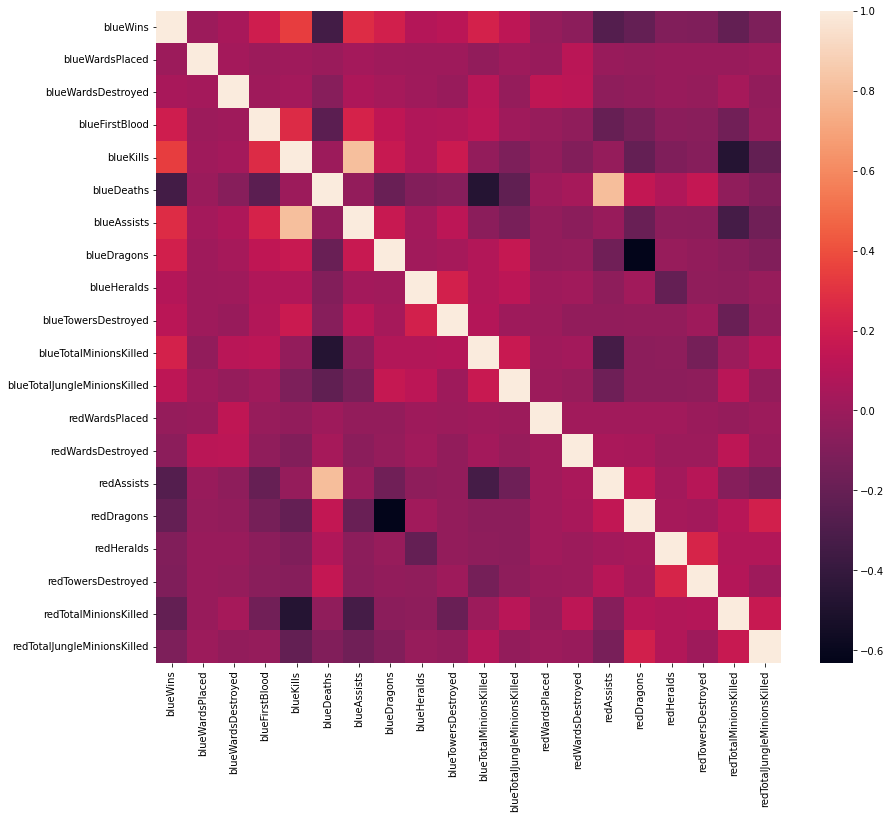

In [10]:
# Create correlation heatmap to verify that we no longer have 
# multicollinearity.
plt.figure(figsize=(14, 12))
sns.heatmap(df_select.corr()) # light color : +vely corr, dark color: -vely corr


Хотя redAssists и blueAssists имеют довольно высокую корреляцию с blueDeaths и blueKills соответственно, мы оставим эти функции в нашем фрейме данных, поскольку коэффициенты корреляции не слишком высоки, а влияние передач на исход матча по-прежнему важно для нашего анализа.

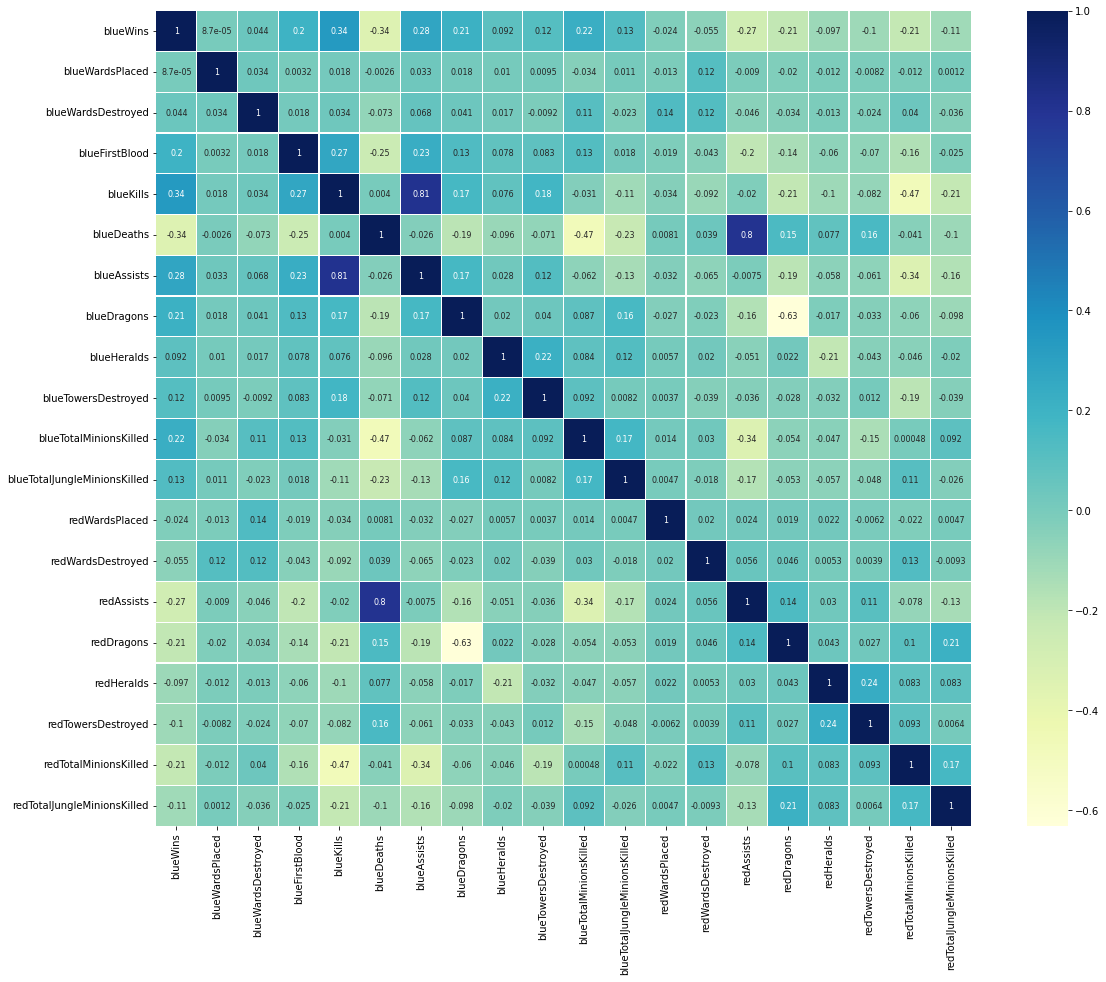

In [11]:
plt.figure(figsize = (20,15))

sns.heatmap(df_select.corr(),annot = True, vmax=1, square=True, cmap="YlGnBu", 
        linewidths=0.1, annot_kws={"size":8})

In [12]:
# Create functions to facilitate scaling, fiting and evaluating multiple 
# dataframes.

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
    """
    Creates train-test splits and scales training data.

    Args:
        df (DataFrame): DataFrame with features and target variable.
        target (str): Name of target variable.
        scaler (scaler object): Scaler to use on features DataFrame. Default
                                is StandardScaler.
        
    Returns:
        X_train (DataFrame) : Training data with scaled feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with scaled feature variables.
        y_test (Series) : Testing data with target variable.
    """
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [13]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

## Basic Logistic Regression on df_select

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7207    0.7256    0.7231      3713
           1     0.7224    0.7175    0.7200      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


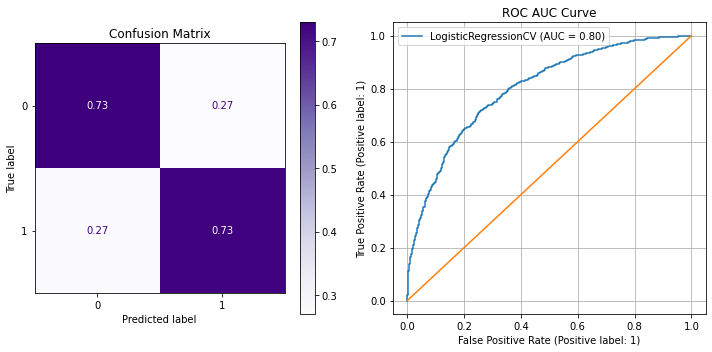

In [14]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

recall score - 0.7215 на обучающих данных training data, а наши тестовые данные test data получили оценку отзыва макросов 0,7275, что означает, что из  побед и поражений наша модель логистической регрессии правильно предсказывает 72,75% из них. У нас также нет проблем с under or overfitting.

Подробнее про метрики:

https://habr.com/ru/company/ods/blog/328372/

https://alexanderdyakonov.wordpress.com/2015/10/09/%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%BA%D0%B8-%D0%BF%D1%80%D0%BE-auc-roc/

http://www.navan.name/roc/

## GridSearch CV - Logistic Regression on df_select

https://newtechaudit.ru/gridsearchcv-pomoshhnik-v-vybore/

In [15]:
# Create parameter grid for Logistic Regression gridsearch and fit to data.
log_reg = LogisticRegression(random_state=42)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid = GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000.0,
                               1000000000000.0],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [16]:
# Print best params for log_grid
log_grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'penalty': 'l2',
 'solver': 'lbfgs'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7203    0.7242    0.7223      3713
           1     0.7214    0.7175    0.7195      3696

    accuracy                         0.7209      7409
   macro avg     0.7209    0.7209    0.7209      7409
weighted avg     0.7209    0.7209    0.7209      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7246    0.7257    0.7251      1236
           1     0.7248    0.7237    0.7242      1234

    accuracy                         0.7247      2470
   macro avg     0.7247    0.7247    0.7247      2470
weighted avg     0.7247    0.7247    0.7247      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


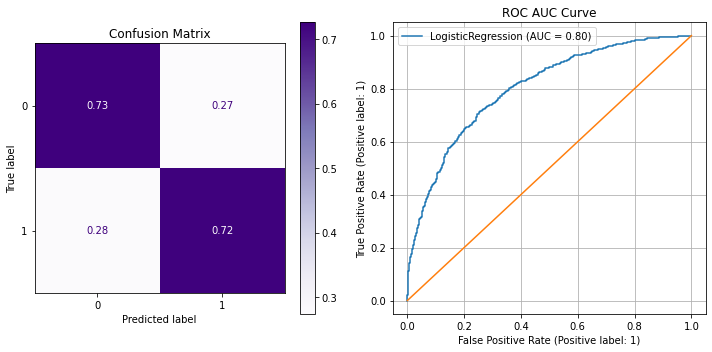

****MODEL PARAMETERS****


,parameters
C,0.1
class_weight,balanced
dual,False
fit_intercept,False
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [17]:
# Evaluate best estimating model.
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

Мы видим небольшое снижение recall  по сравнению с нашей базовой моделью логистической регрессии. Давайте посмотрим, сможем ли мы настроить наши гиперпараметры, чтобы улучшить наш результат.

In [18]:
# Create parameter grid for Logistic Regression gridsearch and fit to data.
log_reg_ref = LogisticRegression(random_state=42)

params = {'C': [0.0001, 0.001],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid_refined = GridSearchCV(log_reg_ref, params, scoring='recall_macro')
log_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [19]:
# Print best params for log_grid_refined
log_grid_refined.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'liblinear'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7185    0.7199    0.7192      3713
           1     0.7181    0.7167    0.7174      3696

    accuracy                         0.7183      7409
   macro avg     0.7183    0.7183    0.7183      7409
weighted avg     0.7183    0.7183    0.7183      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7166    0.7241    0.7203      1236
           1     0.7207    0.7131    0.7169      1234

    accuracy                         0.7186      2470
   macro avg     0.7186    0.7186    0.7186      2470
weighted avg     0.7186    0.7186    0.7186      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


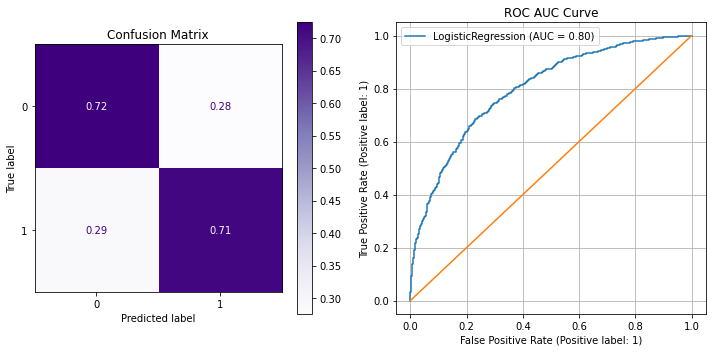

****MODEL PARAMETERS****


,parameters
C,0.001
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [20]:
# Evaluate best estimating model.
evaluate_model(log_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

recall продолжает падать, и поэтому мы  вероятно, достигли максимально возможной оценки с помощью логистической регрессии. Следовательно, мы оставим log_select как нашу лучшую модель логистической регрессии на данный момент.

## Random Forest

### df_select

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3713
           1     1.0000    1.0000    1.0000      3696

    accuracy                         1.0000      7409
   macro avg     1.0000    1.0000    1.0000      7409
weighted avg     1.0000    1.0000    1.0000      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7158    0.7314    0.7235      1236
           1     0.7249    0.7091    0.7169      1234

    accuracy                         0.7202      2470
   macro avg     0.7203    0.7202    0.7202      2470
weighted avg     0.7203    0.7202    0.7202      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


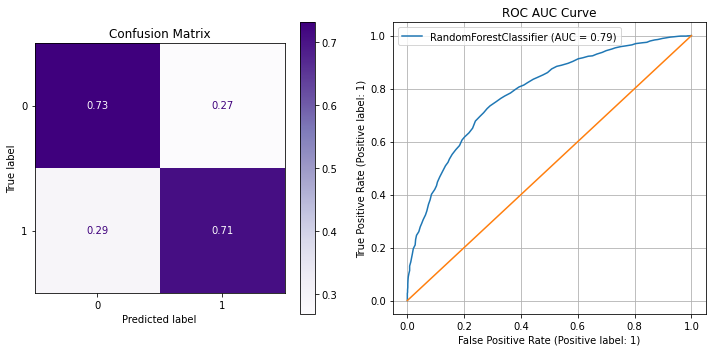

RandomForestClassifier(random_state=42)

In [21]:
# Fit and evaluate Random Forest on df_select.
fit_eval(RandomForestClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

### df_big

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3713
           1     1.0000    1.0000    1.0000      3696

    accuracy                         1.0000      7409
   macro avg     1.0000    1.0000    1.0000      7409
weighted avg     1.0000    1.0000    1.0000      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7173    0.7371    0.7271      1236
           1     0.7292    0.7091    0.7190      1234

    accuracy                         0.7231      2470
   macro avg     0.7232    0.7231    0.7230      2470
weighted avg     0.7232    0.7231    0.7230      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


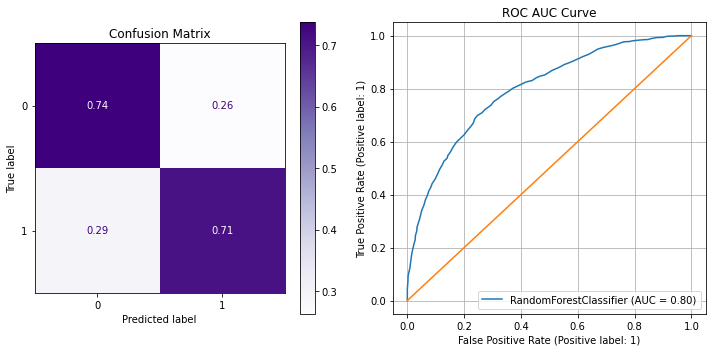

RandomForestClassifier(random_state=42)

In [22]:
# Fit and evaluate Random Forest on df_big. 
fit_eval(RandomForestClassifier(random_state=42), X_train_big, y_train_big, \
                                                  X_test_big, y_test_big)

Хотя оценки отзыва из наших моделей случайного леса, запускаемых на тестовых данных, аналогичны тем, которые мы видели в нашей логистической регрессии, мы сразу видим, что у нас есть  проблема переобучения (overfitting). Чтобы предотвратить overfitting, мы в идеале будем использоватьgridsearch, чтобы найти оптимальные гиперпараметры для этой модели и данных.

## XGBoost: Random Forest

### df_select

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7020    0.7188    0.7103      3713
           1     0.7106    0.6935    0.7019      3696

    accuracy                         0.7062      7409
   macro avg     0.7063    0.7061    0.7061      7409
weighted avg     0.7063    0.7062    0.7061      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6916    0.7095    0.7005      1236
           1     0.7013    0.6831    0.6921      1234

    accuracy                         0.6964      2470
   macro avg     0.6965    0.6963    0.6963      2470
weighted avg     0.6965    0.6964    0.6963      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


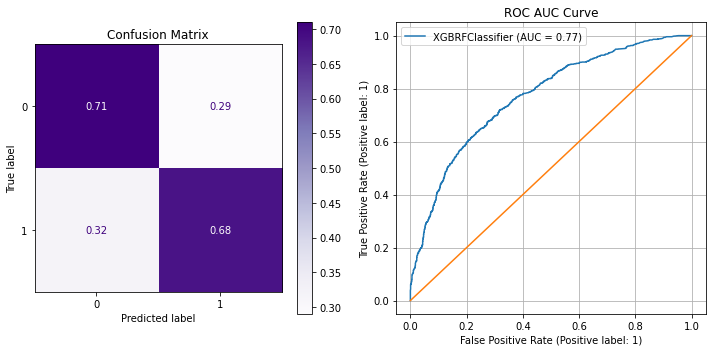

In [23]:
# Fit and evaluate XGBoost on df_select.
xgb_select = fit_eval(XGBRFClassifier(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

### df_big

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7161    0.7590    0.7369      3713
           1     0.7424    0.6978    0.7194      3696

    accuracy                         0.7284      7409
   macro avg     0.7293    0.7284    0.7282      7409
weighted avg     0.7292    0.7284    0.7282      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6993    0.7565    0.7268      1236
           1     0.7343    0.6742    0.7030      1234

    accuracy                         0.7154      2470
   macro avg     0.7168    0.7154    0.7149      2470
weighted avg     0.7168    0.7154    0.7149      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


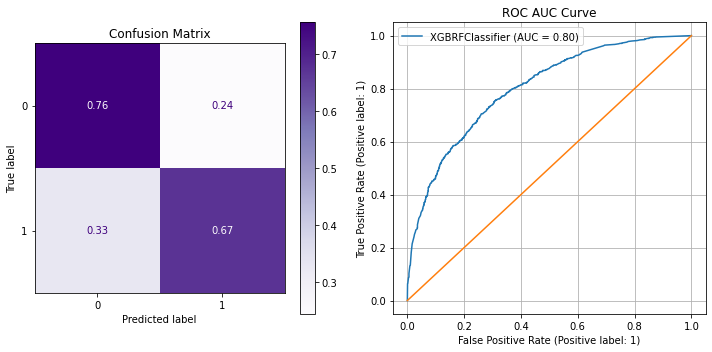

XGBRFClassifier(random_state=42)

In [24]:
# Fit and evaluate XGBoost on df_big.
fit_eval(XGBRFClassifier(random_state=42), \
         X_train_big, y_train_big, X_test_big, y_test_big)

## GridSearch CV - XGBoost: Random Forest on df_select

Далее мы попытаемся улучшить нашу оценку recall  в нашей модели XGBoost, одновременно решая небольшую проблему переобучения. Хотя у нас был немного лучший показатель recall  на df_big, где мы оставили наши функции без изменений, улучшение оценки на 0,3% не стоит того, чтобы жертвовать объяснимостью наших признаков, поэтому мы продолжим с df_select.

In [25]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.03, 0.05, 0.06],
          'max_depth': [4, 5, 6],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.4, 0.5],
          'n_estimators': [100]}
xgb_grid = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(random_state=42),
             param_grid={'learning_rate': [0.03, 0.05, 0.06],
                         'max_depth': [4, 5, 6], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [100], 'subsample': [0.3, 0.4, 0.5]},
             scoring='recall_macro')

In [26]:
# Print best params for xgb_grid
xgb_grid.best_params_

{'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.3}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7436    0.7366    0.7401      3713
           1     0.7379    0.7449    0.7413      3696

    accuracy                         0.7407      7409
   macro avg     0.7407    0.7407    0.7407      7409
weighted avg     0.7407    0.7407    0.7407      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7151    0.7168    0.7160      1236
           1     0.7157    0.7139    0.7148      1234

    accuracy                         0.7154      2470
   macro avg     0.7154    0.7154    0.7154      2470
weighted avg     0.7154    0.7154    0.7154      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


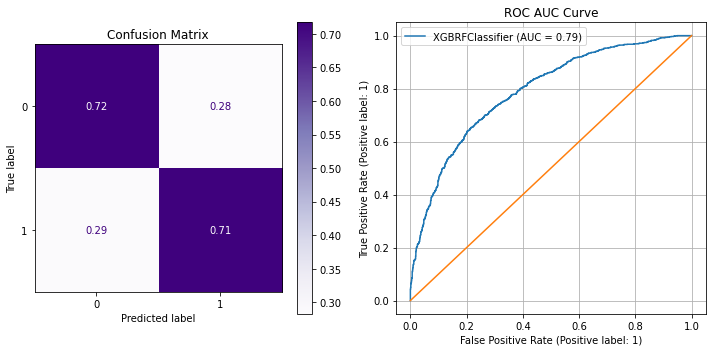

****MODEL PARAMETERS****


,parameters
base_score,0.5
colsample_bylevel,1
colsample_bynode,0.8
colsample_bytree,1
gamma,0
learning_rate,0.03
max_delta_step,0
max_depth,6
min_child_weight,3
missing,None


In [27]:
# Evaluate best estimating model.
evaluate_model(xgb_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

улучшение нашего показателя recall  на 0,49%, что незначительно, но давайте посмотрим, сможем ли мы еще немного настроить наши гиперпараметры.

In [28]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf_ref = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.0001, 0.001],
          'max_depth': [6, 7, 8],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.5, 0.7],
          'n_estimators': [100]}
xgb_grid_refined = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(random_state=42),
             param_grid={'learning_rate': [0.0001, 0.001],
                         'max_depth': [6, 7, 8], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [100], 'subsample': [0.3, 0.5, 0.7]},
             scoring='recall_macro')

In [29]:
# Print best params
xgb_grid_refined.best_params_

{'learning_rate': 0.0001,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.5}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7619    0.7541    0.7580      3713
           1     0.7555    0.7633    0.7594      3696

    accuracy                         0.7587      7409
   macro avg     0.7587    0.7587    0.7587      7409
weighted avg     0.7587    0.7587    0.7587      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7187    0.7152    0.7170      1236
           1     0.7161    0.7196    0.7179      1234

    accuracy                         0.7174      2470
   macro avg     0.7174    0.7174    0.7174      2470
weighted avg     0.7174    0.7174    0.7174      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


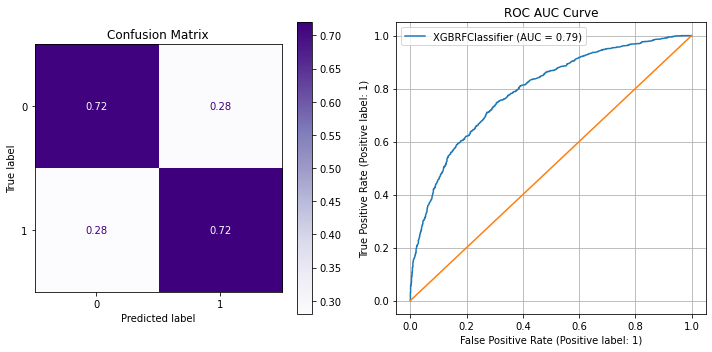

****MODEL PARAMETERS****


,parameters
base_score,0.5
colsample_bylevel,1
colsample_bynode,0.8
colsample_bytree,1
gamma,0
learning_rate,0.0001
max_delta_step,0
max_depth,7
min_child_weight,2
missing,None


In [30]:
# Evaluate best estimating model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

 с recall = 0,7170 на данных тестирования эта модель  с наилучшей прогностической способностью.  оценка на данных обучения составляет 0,7484, что показывает, что у нас нет серьезной проблемы недостаточной или переобучения.

мы можем сделать вывод, что наша базовая модель логистической регрессии log_select и XGBoost gridsearch xgb_grid.bestestimator вернули самые высокие recall  0,7275 и 0,7170 соответственно.

### Logistic Regression

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7207    0.7256    0.7231      3713
           1     0.7224    0.7175    0.7200      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


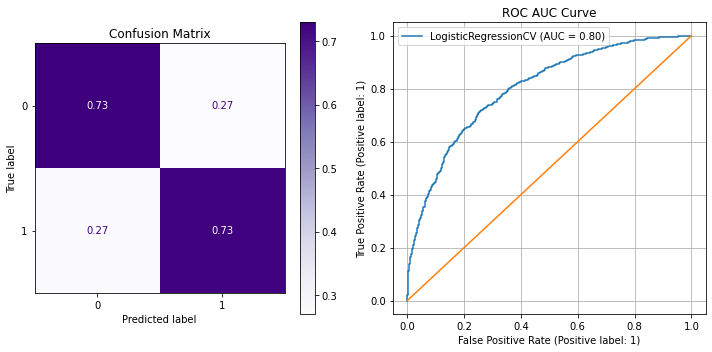

****MODEL PARAMETERS****


,parameters
Cs,10
class_weight,None
cv,None
dual,False
fit_intercept,True
intercept_scaling,1.0
l1_ratios,None
max_iter,100
multi_class,auto
n_jobs,None


In [31]:
# Evaluate best estimating Logistic Regression model.
evaluate_model(log_select, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

### XGBoost: Random Forest

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7619    0.7541    0.7580      3713
           1     0.7555    0.7633    0.7594      3696

    accuracy                         0.7587      7409
   macro avg     0.7587    0.7587    0.7587      7409
weighted avg     0.7587    0.7587    0.7587      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7187    0.7152    0.7170      1236
           1     0.7161    0.7196    0.7179      1234

    accuracy                         0.7174      2470
   macro avg     0.7174    0.7174    0.7174      2470
weighted avg     0.7174    0.7174    0.7174      2470

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


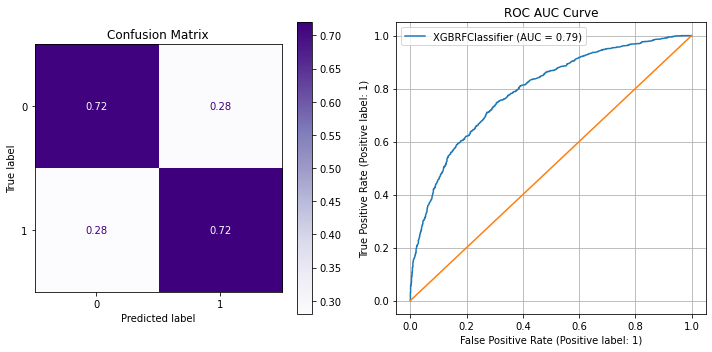

****MODEL PARAMETERS****


,parameters
base_score,0.5
colsample_bylevel,1
colsample_bynode,0.8
colsample_bytree,1
gamma,0
learning_rate,0.0001
max_delta_step,0
max_depth,7
min_child_weight,2
missing,None


In [32]:
# Evaluate best estimating XGBoost model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

## Logistic Regression Coefficient Analysis

Анализ коэффициентов логистической регрессии
recall = 0,7275 в нашей базовой модели логистической регрессии и  0,7170 в gridsearched  XGBoost. Это означает, что наша окончательная модель логистической регрессии способна правильно определить 72,75% побед или поражений на основе данных, собранных в течение первых 10 минут каждого матча, в то время как наша модель XGBoost способна правильно определить 71,70%.

In [33]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff = pd.Series(log_select.coef_.flatten(),
               index=X_train_select.columns).sort_values(ascending=False)
log_coeff

blueKills                       0.728298
blueTotalJungleMinionsKilled    0.247880
blueTotalMinionsKilled          0.232926
blueTowersDestroyed             0.119629
blueDragons                     0.099816
blueHeralds                     0.053624
blueFirstBlood                  0.046913
blueAssists                     0.035660
blueWardsDestroyed              0.026762
blueWardsPlaced                -0.006887
redWardsDestroyed              -0.027312
redAssists                     -0.041991
redHeralds                     -0.042458
redTowersDestroyed             -0.044702
redWardsPlaced                 -0.069512
redDragons                     -0.102748
redTotalJungleMinionsKilled    -0.146236
redTotalMinionsKilled          -0.218261
blueDeaths                     -0.693537
dtype: float64

In [34]:
# Convert log coefficients to odds and subtract 1 to display change in odds.
log_odds = np.exp(log_coeff) - 1
log_odds

blueKills                       1.071553
blueTotalJungleMinionsKilled    0.281306
blueTotalMinionsKilled          0.262288
blueTowersDestroyed             0.127079
blueDragons                     0.104967
blueHeralds                     0.055087
blueFirstBlood                  0.048031
blueAssists                     0.036303
blueWardsDestroyed              0.027124
blueWardsPlaced                -0.006864
redWardsDestroyed              -0.026942
redAssists                     -0.041122
redHeralds                     -0.041569
redTowersDestroyed             -0.043718
redWardsPlaced                 -0.067151
redDragons                     -0.097646
redTotalJungleMinionsKilled    -0.136046
redTotalMinionsKilled          -0.196084
blueDeaths                     -0.500195
dtype: float64

In [35]:
# Change name of columns
renamed_cols = {'blueKills': 'Kills',
                'blueTotalJungleMinionsKilled': 'Total Jungle Minions Killed',
                'blueTotalMinionsKilled': 'Total Minions Killed',
                'blueTowersDestroyed': 'Towers Destroyed',
                'blueDragons': 'Dragons Killed',
                'blueHeralds': 'Heralds Killed',
                'blueFirstBlood': 'First Blood',
                'blueAssists': 'Assists',
                'blueWardsDestroyed': 'Wards Destroyed',
                'blueWardsPlaced': 'Wards Placed',
                'redWardsDestroyed': 'Enemy Wards Destroyed',
                'redHeralds': 'Enemy Heralds Killed',
                'redTowersDestroyed': 'Enemy Towers Destroyed',
                'redAssists': 'Enemy Assists',
                'redWardsPlaced': 'Enemy Wards Placed',
                'redDragons': 'Enemy Dragons Killed',
                'redTotalJungleMinionsKilled': 'Enemy Total Jungle Minions Killed',
                'redTotalMinionsKilled': 'Enemy Total Minions Killed',
                'blueDeaths': 'Enemy Kills'
               }

log_odds.rename(renamed_cols, inplace=True)
log_odds

Kills                                1.071553
Total Jungle Minions Killed          0.281306
Total Minions Killed                 0.262288
Towers Destroyed                     0.127079
Dragons Killed                       0.104967
Heralds Killed                       0.055087
First Blood                          0.048031
Assists                              0.036303
Wards Destroyed                      0.027124
Wards Placed                        -0.006864
Enemy Wards Destroyed               -0.026942
Enemy Assists                       -0.041122
Enemy Heralds Killed                -0.041569
Enemy Towers Destroyed              -0.043718
Enemy Wards Placed                  -0.067151
Enemy Dragons Killed                -0.097646
Enemy Total Jungle Minions Killed   -0.136046
Enemy Total Minions Killed          -0.196084
Enemy Kills                         -0.500195
dtype: float64

In [36]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

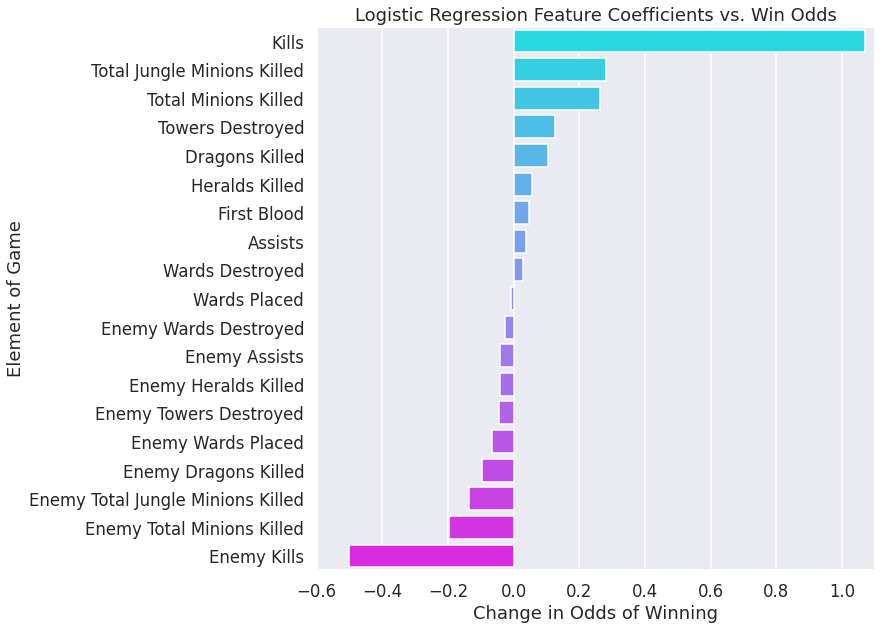

In [37]:
# Create bar plot of feature coefficients as odds.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=log_odds.values, y=log_odds.index, palette='cool', ax=ax, orient='h')

ax.set_title('Logistic Regression Feature Coefficients vs. Win Odds')
ax.set_xlabel('Change in Odds of Winning')
ax.set_ylabel('Element of Game')
ax.set_xlim([-.6, 1.1]);

# ax.set_xticks([-.15,.15])
# ax.set_xticklabels(['Decrease in Odds','Increase in Odds'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

мы видим, что champion kills and deaths убийства и смерти чемпионов в течение первых 10 минут матча оказывают наибольшее влияние на исход матча. Мы видим, что общее количество миньонов на линии, общее количество  minions and total jungle creeps and dragons крипов и драконов также имеет большое значение. Удивительно, но Heralds, vision wards, and towers имеют наименьшее значение.

Поскольку наши отображаемые единицы представлены в виде шансов, мы можем видеть, что увеличение на 1 стандартное отклонение каждой из вышеперечисленных функций приведет к соответствующему процентному увеличению или уменьшению шансов на победу.

## XGBoost Random Forest Feature Importance

рассмотрим ранжирование важности признаков из  модели XGBoost, чтобы сравнить с размером коэффициентов в нашей модели логистической регрессии.

In [38]:
# Extract coefficients from log_grid.best_estimator_ model.
xgb_importance = pd.Series(xgb_grid_refined.best_estimator_.feature_importances_,
               index=X_train_select.columns).sort_values(ascending=False)
xgb_importance

blueDeaths                      0.253477
blueKills                       0.235157
blueAssists                     0.053806
blueDragons                     0.039849
redDragons                      0.039650
redAssists                      0.037103
redTotalMinionsKilled           0.034869
blueTotalJungleMinionsKilled    0.033997
blueTotalMinionsKilled          0.032729
blueTowersDestroyed             0.030543
blueHeralds                     0.028102
redTotalJungleMinionsKilled     0.026817
blueFirstBlood                  0.025173
redHeralds                      0.024505
redTowersDestroyed              0.023359
blueWardsDestroyed              0.020651
redWardsPlaced                  0.020472
blueWardsPlaced                 0.020048
redWardsDestroyed               0.019692
dtype: float32

In [39]:
# Change name of columns
xgb_importance.rename(renamed_cols, inplace=True)
xgb_importance

Enemy Kills                          0.253477
Kills                                0.235157
Assists                              0.053806
Dragons Killed                       0.039849
Enemy Dragons Killed                 0.039650
Enemy Assists                        0.037103
Enemy Total Minions Killed           0.034869
Total Jungle Minions Killed          0.033997
Total Minions Killed                 0.032729
Towers Destroyed                     0.030543
Heralds Killed                       0.028102
Enemy Total Jungle Minions Killed    0.026817
First Blood                          0.025173
Enemy Heralds Killed                 0.024505
Enemy Towers Destroyed               0.023359
Wards Destroyed                      0.020651
Enemy Wards Placed                   0.020472
Wards Placed                         0.020048
Enemy Wards Destroyed                0.019692
dtype: float32

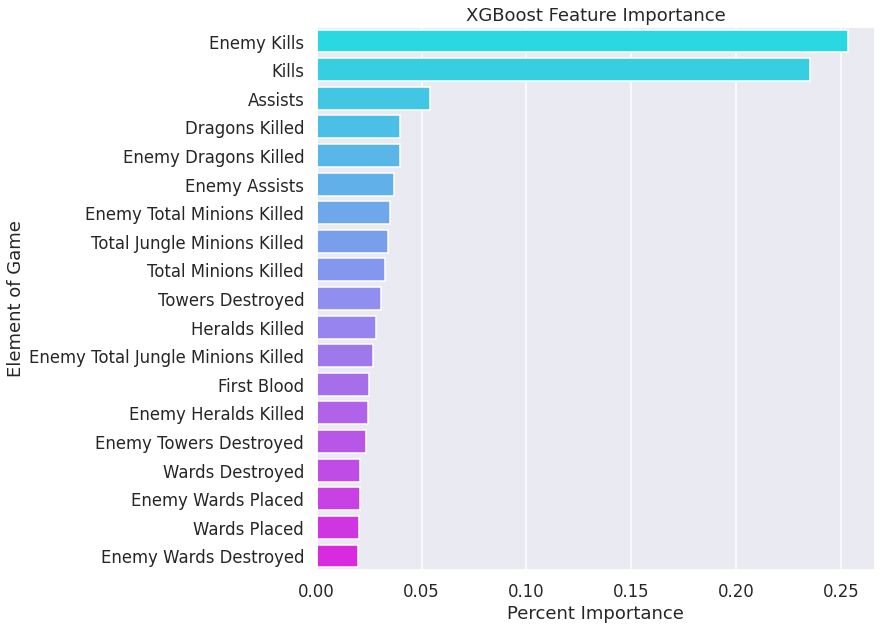

In [40]:
# Create bar plot of feature importances.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='cool', ax=ax, orient='h')

ax.set_title('XGBoost Feature Importance')
ax.set_xlabel('Percent Importance')
ax.set_ylabel('Element of Game');

## Individual Features vs. Win Rate

Теперь давайте посмотрим, какие проценты побед мы получаем по отдельным признакам, которые либо имели большое значение, либо которые, как мы могли ожидать, будут значительными.

### Win or Loss vs Minions Killed at 10 minutes

In [41]:
# Create series that displays the mean total minions killed for matches that
# resulted in losses and wins.
df_viz = df.copy()
df_minions = df_viz.groupby('blueWins').agg('mean')['blueTotalMinionsKilled']
df_minions

blueWins
0    211.793090
1    221.624949
Name: blueTotalMinionsKilled, dtype: float64

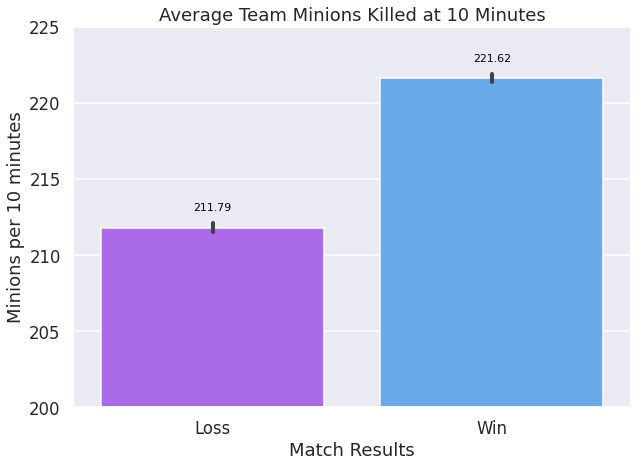

In [42]:
# Create bar plot of mean number of minions killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueWins', y='blueTotalMinionsKilled', palette='cool_r', ax=ax, ci=68)

ax.set_title('Average Team Minions Killed at 10 Minutes')
ax.set_xlabel('Match Results')
ax.set_ylabel('Minions per 10 minutes')
ax.set_xticklabels(['Loss','Win'])

# Method for displaying values at the top of bars found at:
# https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart
x_axis = ax.get_xticklabels()
y_axis = [df_minions.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points')

ax.set_ylim([200, 225]);

существует разница примерно в 10 в общем количестве миньонов, убитых на 10-минутной отметке, которая определяет разницу между проигрышем и победой. Чтобы максимизировать наши шансы на победу, мы хотим убедиться, что команда достигает общего количества убийств миньонов выше 222 в течение 10 минут после начала матча.

### Win or Loss vs Jungle Minions Killed at 10 minutes

In [43]:
# Create series that displays the mean jungle minions killed for matches that
# resulted in losses and wins.
df_jungle = df_viz.groupby('blueWins')\
                  .agg('mean')['blueTotalJungleMinionsKilled']
df_jungle

blueWins
0    49.211154
1    51.813185
Name: blueTotalJungleMinionsKilled, dtype: float64

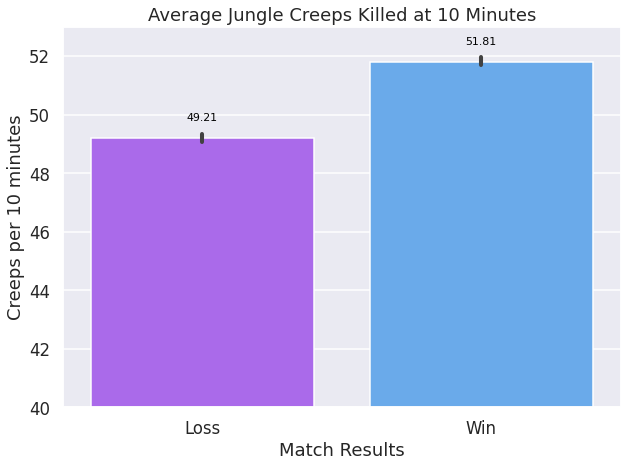

In [44]:
# Create bar plot of mean number of jungle minions killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueWins', y='blueTotalJungleMinionsKilled', palette='cool_r', ax=ax, ci=68)

ax.set_title('Average Jungle Creeps Killed at 10 Minutes')
ax.set_xlabel('Match Results')
ax.set_ylabel('Creeps per 10 minutes')
ax.set_xticklabels(['Loss','Win'])

x_axis = ax.get_xticklabels()
y_axis = [df_jungle.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points')

ax.set_ylim([40, 53]);

Хотя разница в общем количестве убитых лесных крипов между поражениями и победами меньше, чем мы видели в разнице в убийствах миньонов на линиях, мы хотим убедиться, что наш лесник может убить более 52 лесных крипов, чтобы максимизировать шансы на победу.

### Kill Count vs Win Rate

In [45]:
# Calculate percent of games won for each number of kills per game

# Calculate total matches for each kill count
df_kills = df.copy()
df_kills_total = df_kills.groupby('blueKills').count()
df_kills_total = df_kills_total[['blueWins']]
# Calculate number of won matches for each kill count
df_kills_won = df_kills.groupby('blueKills').sum()
df_kills_percent_won = df_kills_won['blueWins'] / df_kills_total['blueWins']
# Display percent of wins per kill count
df_kills_percent_won

blueKills
0     0.142857
1     0.191693
2     0.244663
3     0.278081
4     0.407251
5     0.422427
6     0.510590
7     0.556239
8     0.599788
9     0.687587
10    0.707780
11    0.747059
12    0.803922
13    0.897959
14    0.843750
15    0.842105
16    0.966667
17    1.000000
18    1.000000
19    1.000000
22    1.000000
Name: blueWins, dtype: float64

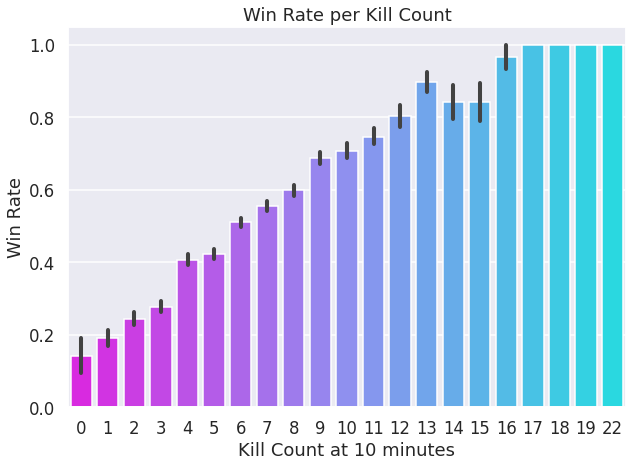

In [46]:
# Create bar plot of kills vs win rates.
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueKills', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Kill Count')
ax.set_xlabel('Kill Count at 10 minutes')
ax.set_ylabel('Win Rate');

график указывает на то, что явно существует корреляция между количеством убийств, совершенных к 10-минутной отметке, и вероятностью того, что матч завершится победой.

### Dragons vs Win Rate

In [47]:
# Calculate percent of games won for dragons killed or not

# Calculate total matches for dragons killed or not
df_drag = df.copy()
df_drag_total = df_drag.groupby('blueDragons').count()
df_drag_total = df_drag_total[['blueWins']]
# Calculate number of won matches for dragons killed or not
df_drag_won = df_drag.groupby('blueDragons').sum()
df_drag_percent_won = df_drag_won['blueWins'] / df_drag_total['blueWins']
# Display percent of wins for dragons killed or not
df_drag_percent_won

blueDragons
0    0.418531
1    0.640940
Name: blueWins, dtype: float64

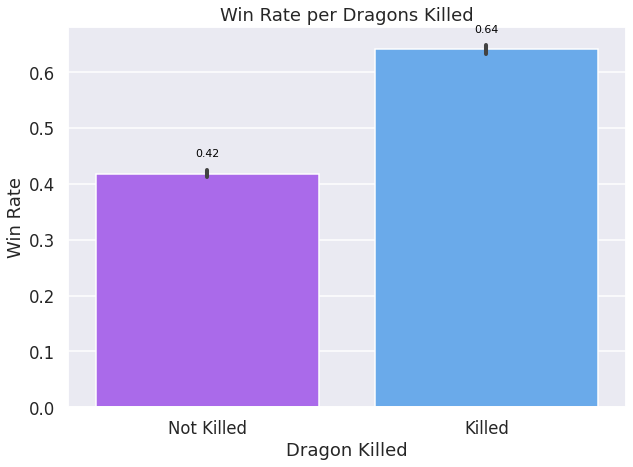

In [48]:
# Create bar plot of Dragons vs win rate
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueDragons', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Dragons Killed')
ax.set_xlabel('Dragon Killed')
ax.set_ylabel('Win Rate')
ax.set_xticklabels(['Not Killed','Killed'])

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points');

существует большая разница в проценте побед, если дракон убит или нет.

### Heralds vs Win Rate

In [49]:
# Calculate percent of games won for Herald killed or not

# Calculate total matches for Herald killed or not
df_herald = df.copy()
df_herald_total = df_herald.groupby('blueHeralds').count()
df_herald_total = df_herald_total[['blueWins']]
# Calculate number of won matches for Herald killed or not
df_herald_won = df_herald.groupby('blueHeralds').sum()
df_herald_percent_won = df_herald_won['blueWins'] / df_herald_total['blueWins']
#Display percent of wins for Herald killed or not
df_herald_percent_won

blueHeralds
0    0.476814
1    0.595046
Name: blueWins, dtype: float64

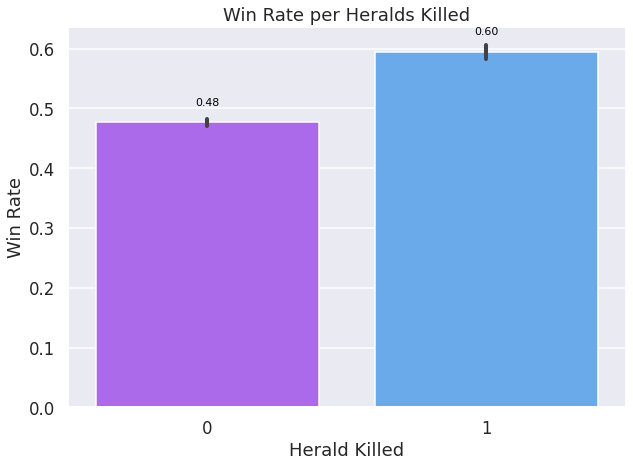

In [50]:
# Create bar plot of Heralds vs win rate
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueHeralds', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Heralds Killed')
ax.set_xlabel('Herald Killed')
ax.set_ylabel('Win Rate')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points');

In [51]:
df_select.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,216.699565,50.509667,22.367952,2.723150,6.662112,0.413098,0.160036,0.043021,217.349226,51.313088
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,21.858437,9.898282,18.457427,2.138356,4.060612,0.492415,0.366658,0.216900,21.911668,10.027885
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,4.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,202.000000,44.000000,14.000000,1.000000,4.000000,0.000000,0.000000,0.000000,203.000000,44.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,218.000000,50.000000,16.000000,2.000000,6.000000,0.000000,0.000000,0.000000,218.000000,51.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,232.000000,56.000000,20.000000,4.000000,9.000000,1.000000,0.000000,0.000000,233.000000,57.000000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,283.000000,92.000000,276.000000,24.000000,28.000000,1.000000,1.000000,2.000000,289.000000,92.000000


"Based on the above findings, we can see that champion kills and assists, lane minions, jungle minions, and dragons have the highest impact on the outcome of a high ranking League of Legends match.

My primary recommendation would be to focus heavily on the Jungler role. While optimizing an efficient jungle clearing path to maximize the number of jungle creeps killed, we want to make sure to capitalize on any early champion kills that might be possible if the Jungler can execute an effective gank.

My secondary recommendation would be to have all laners heavily drill last hitting minions to maximize the number of minion kills in the early stages of the match. There are a total of 107 minions that spawn per lane within the first 10 minutes of the match, and we want to aim for a team total of 222 minions or more. This means that each laner must kill at least 74 minions, while avoiding death and if possible, securing champion kills.

Lastly, since dragons are also of high importance, the Support role should place vision wards close to the dragon pit in order to maintain map control in that area, while the AD Carry role focuses on securing minions kills within his/her lane.

Some considerations for further analysis would include:
1. Whether we can find additional features outside of the scope of the selected dataset to improve the predictive capability of our models.
2. Analyzing data collected at the end of each match to identify what elements of the game led to a quicker vs. slower victory so that we can adjust the team strategy mid-game to increase the odds of winning.
3. Collect data on the specific eSports team's actual performance to identify what areas need to be targeted".

Jonathan Lee https://github.com/ds-leehanjin/league-of-legends-outcome-classification/blob/master/notebook_final.ipynb

https://www.kaggle.com/code/adityaapp/game-predictors-with-logistic-regression 

Total Gold is the most deciding factor for early game success

Having a lot of gold allows our champion to be stronger by having better items. This should come as no surprise for League of Legends players.

To achieve this we must have a good cs, kill participation, and take down objectives should be the priority

Taking down Dragons

Dragons are an elite monster that gives not only gold and experience but also buffs the team that slain them.

This model emphasizes this quite greatly, as the team's buff will be permanent until the end of the game. This also means fighting over the dragon will be really rewarding if your team manages to get it.

Taking down towers early

Taking down towers means that the players in that lane are most likely to be winning. Having a tower advantage over your enemy brings benefits, such as map control and overall gold.

With such advantages, it is also hard to do it early as the towers will have protection plates. Successfully achieving this gives a lot more freedom for the laner to roam over the map, and help the teammates.

In [52]:
df_league = df_big.copy()
df_league

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [53]:
#Adding the difference for both teams to reduce redundancy
df_league['avgLevelDiff'] = df_league['blueAvgLevel'] - df_league['redAvgLevel']
df_league['minionsKilledDiff'] = df_league['blueTotalMinionsKilled'] - df_league['redTotalMinionsKilled']
df_league['jungleKilledDiff'] = df_league['blueTotalJungleMinionsKilled'] - df_league['redTotalJungleMinionsKilled']
df_league[['avgLevelDiff','minionsKilledDiff','jungleKilledDiff']]

,avgLevelDiff,minionsKilledDiff,jungleKilledDiff
0,-0.2,-2,-19
1,-0.2,-66,-9
2,-0.4,-17,18
3,0.0,-34,8
4,0.0,-15,-10
...,...,...,...
9874,0.4,-18,35
9875,0.2,27,-8
9876,-0.4,-51,-15
9877,-0.6,-23,8


In [54]:
#Some columns that are redundant or unnecessary will not be selected
columns = ['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueAssists',
       'blueDragons', 'blueHeralds',
       'blueTowersDestroyed','blueGoldDiff',
       'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redAssists',
       'redDragons', 'redHeralds', 'redTowersDestroyed',
       'avgLevelDiff','minionsKilledDiff','jungleKilledDiff']
df = df_league[columns]
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueGoldDiff,redWardsPlaced,redWardsDestroyed,redKills,redAssists,redDragons,redHeralds,redTowersDestroyed,avgLevelDiff,minionsKilledDiff,jungleKilledDiff
0,0,28,2,1,9,11,0,0,0,643,15,6,6,8,0,0,0,-0.2,-2,-19
1,0,12,1,0,5,5,0,0,0,-2908,12,1,5,2,1,1,1,-0.2,-66,-9
2,0,15,0,0,7,4,1,0,0,-1172,15,3,11,14,0,0,0,-0.4,-17,18
3,0,43,1,0,4,5,0,1,0,-1321,15,2,5,10,0,0,0,0.0,-34,8
4,0,75,4,0,6,6,0,0,0,-1004,17,2,6,7,1,0,0,0.0,-15,-10


In [55]:
df = df_league[columns]
df.corr()['blueWins'][:-1].sort_values()

redKills              -0.339297
redAssists            -0.271047
redDragons            -0.209516
redTowersDestroyed    -0.103696
redHeralds            -0.097172
redWardsDestroyed     -0.055400
redWardsPlaced        -0.023671
blueWardsPlaced        0.000087
blueWardsDestroyed     0.044247
blueHeralds            0.092385
blueTowersDestroyed    0.115566
blueFirstBlood         0.201769
blueDragons            0.213768
blueAssists            0.276685
minionsKilledDiff      0.309126
blueKills              0.337358
avgLevelDiff           0.452927
blueGoldDiff           0.511119
blueWins               1.000000
Name: blueWins, dtype: float64

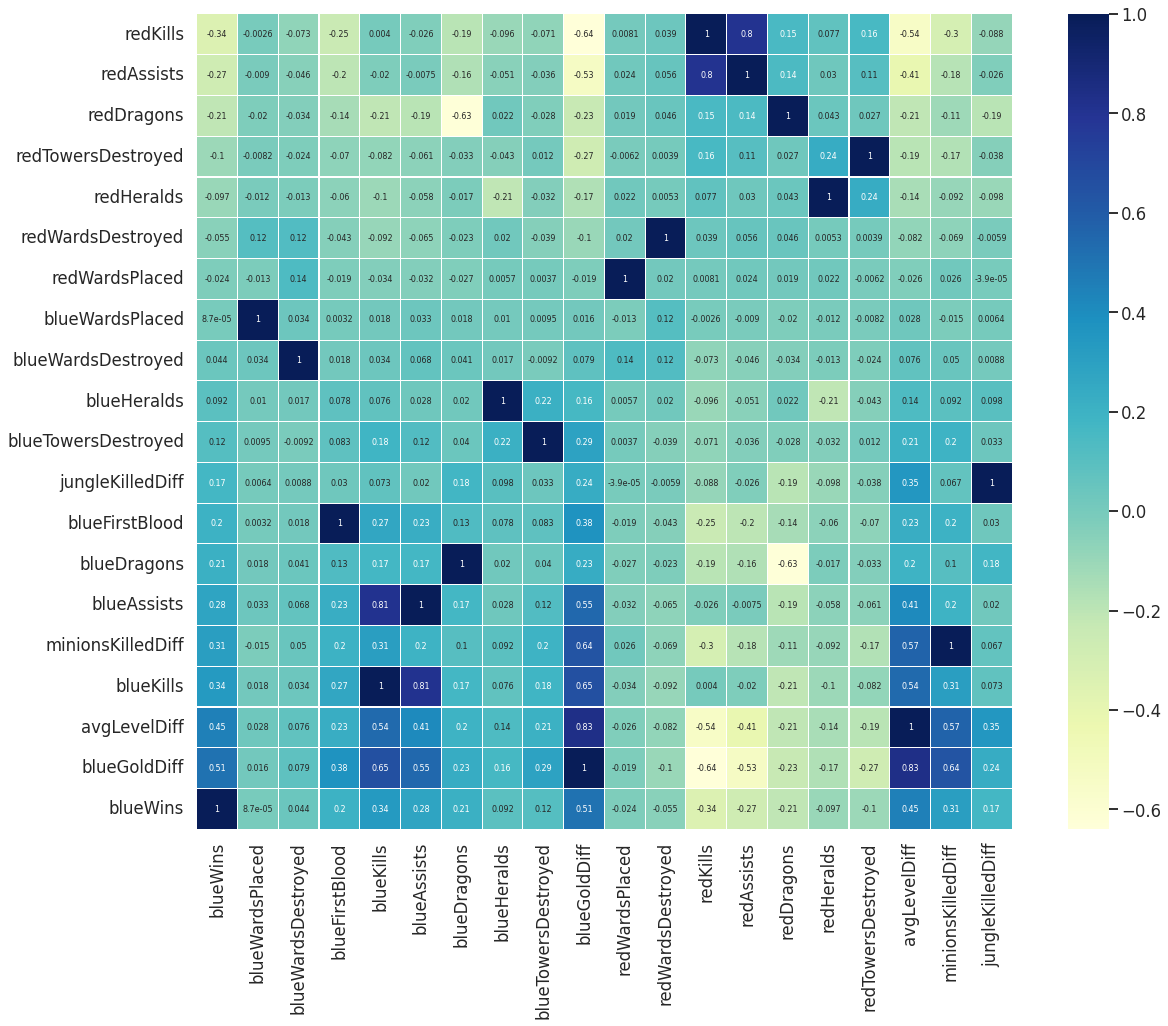

In [56]:
plt.figure(figsize = (20,15))

sns.heatmap(df.corr().sort_values(by='blueWins'),annot = True, vmax=1, square=True, cmap="YlGnBu", 
        linewidths=0.1, annot_kws={"size":8})

In [57]:
df.groupby('blueWins')['blueWins'].count()

blueWins
0    4949
1    4930
Name: blueWins, dtype: int64

In [58]:
feature_cols = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueAssists',
       'blueDragons', 'blueHeralds',
       'blueTowersDestroyed','blueGoldDiff',
       'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redAssists',
       'redDragons', 'redHeralds', 'redTowersDestroyed',
       'avgLevelDiff','minionsKilledDiff','jungleKilledDiff']

x = df[feature_cols]
x = StandardScaler().fit(x).transform(x.astype(float))
y = df.blueWins

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

Text(0.5, 1.5, 'Predicted label')

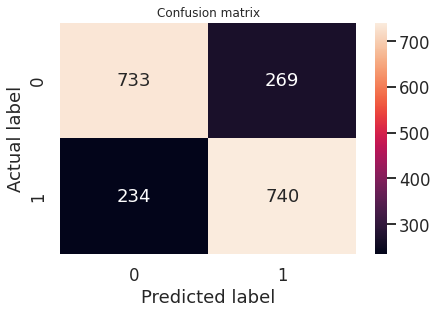

In [60]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
sns.set(rc={'figure.figsize':(5,3)})
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7454453441295547
Precision: 0.7333994053518335
Recall: 0.7597535934291582
F1 Score: 0.746343923348462


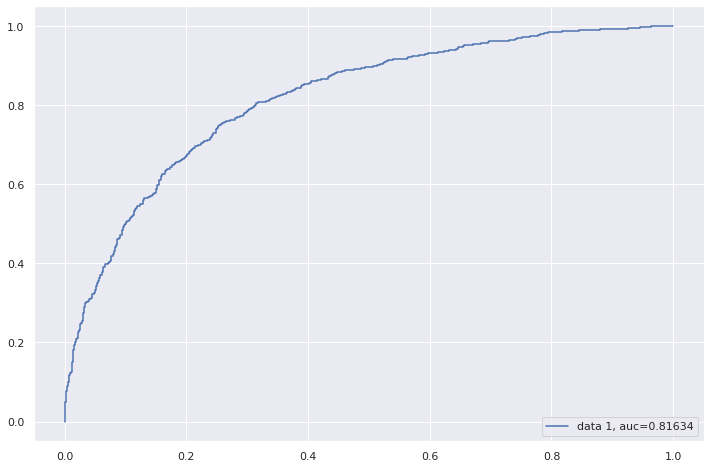

In [62]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc, 5)))
plt.legend(loc=4)
plt.show()

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7294    0.7294    0.7294      3947
           1     0.7300    0.7300    0.7300      3956

    accuracy                         0.7297      7903
   macro avg     0.7297    0.7297    0.7297      7903
weighted avg     0.7297    0.7297    0.7297      7903

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7580    0.7315    0.7445      1002
           1     0.7334    0.7598    0.7463       974

    accuracy                         0.7454      1976
   macro avg     0.7457    0.7456    0.7454      1976
weighted avg     0.7459    0.7454    0.7454      1976

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


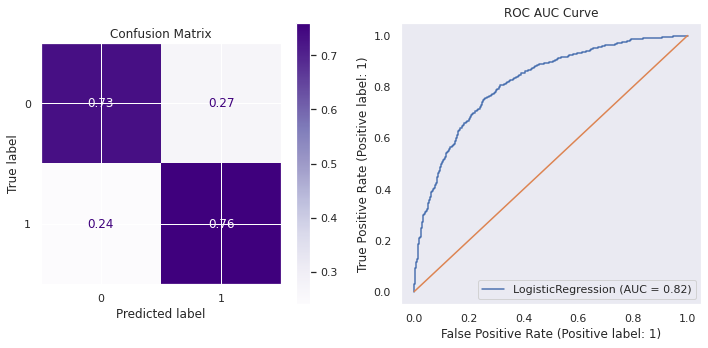

****MODEL PARAMETERS****


,parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [63]:
# Evaluate best estimating Logistic Regression model.
evaluate_model(logreg, x_train, y_train, \
               x_test, y_test, params=True)

Feature: 0, Score: -0.029 blueWardsPlaced
Feature: 1, Score: -0.018 blueWardsDestroyed
Feature: 2, Score: 0.011 blueFirstBlood
Feature: 3, Score: -0.037 blueKills
Feature: 4, Score: -0.076 blueAssists
Feature: 5, Score: 0.168 blueDragons
Feature: 6, Score: 0.033 blueHeralds
Feature: 7, Score: -0.104 blueTowersDestroyed
Feature: 8, Score: 1.424 blueGoldDiff
Feature: 9, Score: -0.017 redWardsPlaced
Feature: 10, Score: -0.012 redWardsDestroyed
Feature: 11, Score: -0.027 redKills
Feature: 12, Score: 0.126 redAssists
Feature: 13, Score: -0.139 redDragons
Feature: 14, Score: -0.029 redHeralds
Feature: 15, Score: 0.089 redTowersDestroyed
Feature: 16, Score: 0.182 avgLevelDiff
Feature: 17, Score: -0.068 minionsKilledDiff
Feature: 18, Score: 0.024 jungleKilledDiff


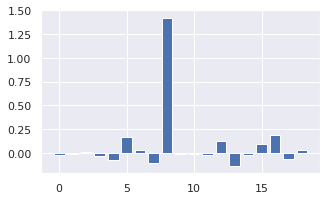

In [64]:
from matplotlib import pyplot
importance = logreg.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v),df[feature_cols].columns[i])
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [65]:
importance

array([-0.02861928, -0.0178534 ,  0.01115734, -0.03692108, -0.07596352,
        0.16779596,  0.03314839, -0.10371145,  1.42361811, -0.01745136,
       -0.01238577, -0.02695446,  0.12570171, -0.1390173 , -0.02922661,
        0.08914942,  0.1823026 , -0.06769455,  0.02379686])

In [66]:
df[feature_cols].columns[0]

'blueWardsPlaced'

In [67]:
logreg.predict_proba(x)

array([[0.45335263, 0.54664737],
       [0.8375492 , 0.1624508 ],
       [0.54273988, 0.45726012],
       ...,
       [0.82786024, 0.17213976],
       [0.591407  , 0.408593  ],
       [0.4208917 , 0.5791083 ]])

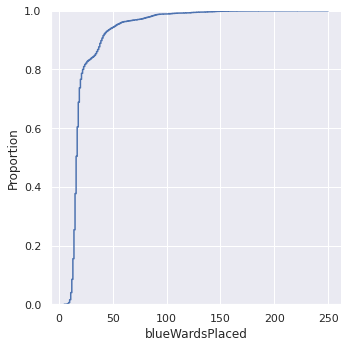

In [68]:
sns.displot(df['blueWardsPlaced'],kind="ecdf")

Мы можем видеть в некоторых играх, что синие игроки поставили более 100 в течение 10 минут, что не является обычным действием. Некоторые игроки думают, что игра уже проиграна, и ставят варды, чтобы дождаться окончания игры, потому что они не могут сдаться в течение 10 минут. Мы удаляем всех размещенных вардов больше 100.


We can see in some games,blue players has placed more than 100 within 10 minutes, which is not an usual action. Some players think the game are already lost, placing wards in to wait for the game end due to they cannot surrender within 10 minutes. We remove any wardplaced more than 100.

In [69]:
'''
#Remove bluewardsplaced more than 100
d1f = d1f.loc[d1f['blueWardsPlaced'] <= 100]
d1f.shape
'''

"\n#Remove bluewardsplaced more than 100\nd1f = d1f.loc[d1f['blueWardsPlaced'] <= 100]\nd1f.shape\n"

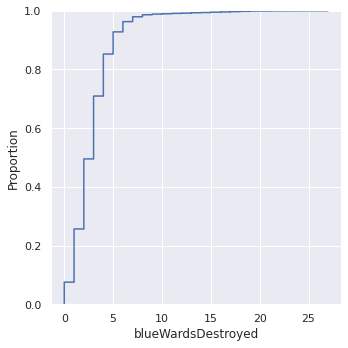

In [70]:
sns.displot(df['blueWardsDestroyed'],kind="ecdf")

По той же причине, что и выше, у победившего игрока могут быть бесплатные варды от проигравшей стороны, как только матч перейдет в мусорное время. Мы удаляем любое значение, превышающее 99%.


For the same reason above, winning player can have free wards from the losing side once the match goes into garbage time.\ We remove any value over 99%.

In [72]:
#d1f = df.loc[df['blueWardsDestroyed'] <= np.quantile(df['blueWardsDestroyed'],q=0.99)]

In [ ]:
#sns.displot(df['blueDeaths'],kind="ecdf")

In [ ]:
#d1f['blueDeaths'].loc[d1f['blueDeaths'] >= 20]

Попробуем нейросети

https://habr.com/ru/post/482126/ 

In [87]:
import tensorflow as tf
from tensorflow.keras import layers

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [89]:
df_ker = df[['blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]

df_ker

,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [90]:
train_test_split=0.7

num_example = df_ker.shape[0]
num_train_example= int(np.floor(num_example*train_test_split))
num_test_example = int(np.floor(num_example-num_train_example))



print(num_example,num_train_example,num_test_example)

9879 6915 2964


In [91]:
optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [120]:
inputs = tf.keras.Input(shape=(df_ker.shape[1],))
x = tf.keras.layers.Dense(df_ker.shape[1]/2, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(df_ker.shape[1]/2,activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [93]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(
    optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [95]:
X_train = df_ker.iloc[0:num_train_example,:] 
X_test = df_ker.iloc[0:num_test_example,:] 

y_train = y.iloc[0:num_train_example] 
y_test = y.iloc[0:num_test_example] 

In [96]:
model.fit(
    x=X_train, y=y_train,
    batch_size=32, epochs=300,
    verbose=1, 
    callbacks=None,
    validation_split=0.2, 
    shuffle=True,
)

Epoch 1/300
173/173 [==============================] - 1s 3ms/step - loss: 57.5793 - accuracy: 0.5813 - val_loss: 9.5117 - val_accuracy: 0.6508
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 8.4871 - accuracy: 0.6414 - val_loss: 11.6834 - val_accuracy: 0.6696
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 6.1249 - accuracy: 0.6437 - val_loss: 4.3642 - val_accuracy: 0.5589
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 5.9147 - accuracy: 0.6345 - val_loss: 5.7340 - val_accuracy: 0.6262
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 4.5344 - accuracy: 0.6480 - val_loss: 3.7912 - val_accuracy: 0.6457
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 4.2575 - accuracy: 0.6444 - val_loss: 4.2955 - val_accuracy: 0.6211
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 4.4878 - accuracy: 0.6341 - val_loss: 8.8023 - val_accuracy: 0.54

In [97]:
z_vse = model.evaluate(X_test,y_test)
z_vse

93/93 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.7274


[0.5645977854728699, 0.7273954153060913]